In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

df = pd.read_csv('../data/processed/titanic_cleaned.csv') 

print("🔍 FORMA DEL DATASET:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}\n")

print("📋 PRIMERAS 5 FILAS:")
display(df.head())

print("\n📊 TIPOS DE DATOS Y VALORES NO NULOS:")
print(df.info())

print("\n🧮 ESTADÍSTICAS DESCRIPTIVAS (numéricas):")
display(df.describe().round(2))

print("\n🔤 ESTADÍSTICAS PARA VARIABLES CATEGÓRICAS:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\n--- {col.upper()} ---")
    print(df[col].value_counts(dropna=False))
    print(f"Porcentajes:\n{df[col].value_counts(normalize=True).round(3) * 100}%")

print("\n🔢 ESTADÍSTICAS PARA VARIABLES BINARIAS/ENTERAS (como HasCabin, Survived, etc.):")
binary_cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'HasCabin']
for col in binary_cols:
    if col in df.columns:
        print(f"\n--- {col.upper()} ---")
        print(df[col].value_counts(dropna=False))
        print(f"Porcentajes:\n{df[col].value_counts(normalize=True).round(3) * 100}%")

duplicates = df.duplicated().sum()
print(f"\n⚠️ FILAS DUPLICADAS: {duplicates}")

print("\n🧩 VALORES ÚNICOS EN 'Embarked':", df['Embarked'].unique())
print("🧩 VALORES ÚNICOS EN 'Sex':", df['Sex'].unique())
print("🧩 VALORES ÚNICOS EN 'Pclass':", df['Pclass'].unique())

# 6. Verificar rangos razonables (ej: edad negativa, tarifa negativa)
print("\n❗ VERIFICACIÓN DE VALORES FUERA DE RANGO:")
print("Edades negativas:", (df['Age'] < 0).sum())
print("Tarifas negativas:", (df['Fare'] < 0).sum())
print("Edad máxima:", df['Age'].max(), "| Edad mínima:", df['Age'].min())
print("Tarifa máxima:", df['Fare'].max(), "| Tarifa mínima:", df['Fare'].min())

🔍 FORMA DEL DATASET:
Filas: 891, Columnas: 12

📋 PRIMERAS 5 FILAS:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0



📊 TIPOS DE DATOS Y VALORES NO NULOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  HasCabin     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None

🧮 ESTADÍSTICAS DESCRIPTIVAS (numéricas):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.36,0.52,0.38,32.20,0.23
std,257.35,0.49,0.84,13.02,1.10,0.81,49.69,0.42
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,22.00,0.00,0.00,7.91,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45,0.00
75%,668.50,1.00,3.00,35.00,1.00,0.00,31.00,0.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33,1.00



🔤 ESTADÍSTICAS PARA VARIABLES CATEGÓRICAS:

--- NAME ---
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64
Porcentajes:
Name
Dooley, Mr. Patrick                                    0.1
Braund, Mr. Owen Harris                                0.1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    0.1
Heikkinen, Miss. Laina                                 0.1
Futrelle, Mrs. Ja

In [19]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})

output_dir = '../results'
os.makedirs(output_dir, exist_ok=True)

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight') 

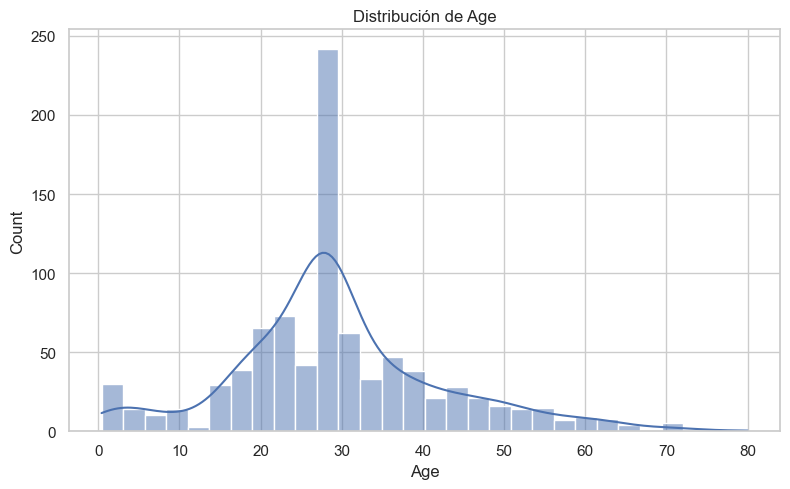

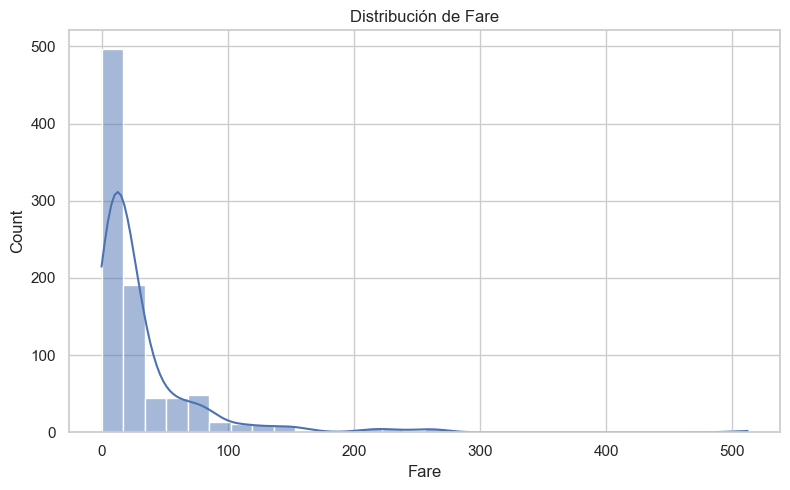

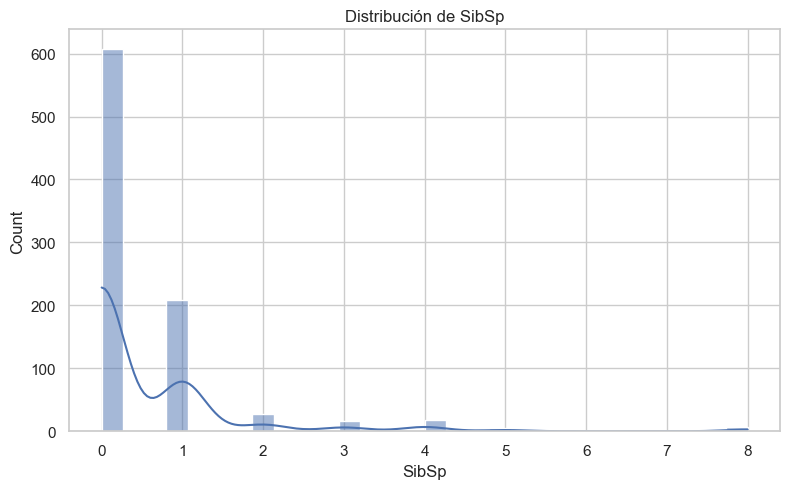

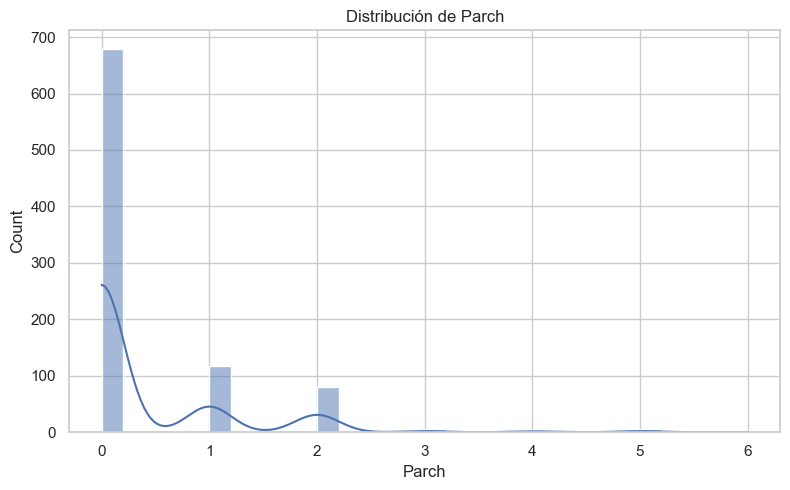

In [20]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    save_plot(f'dist_{col}.png')
    plt.show()  
    plt.close()  

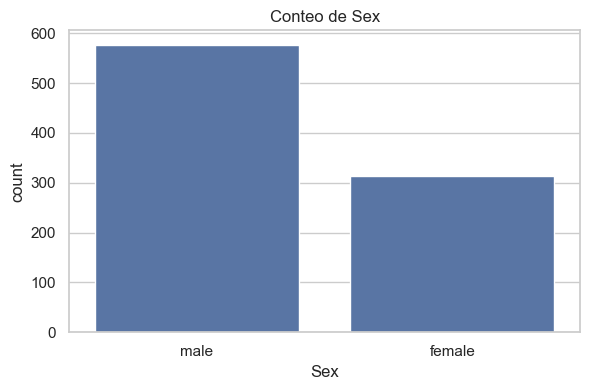

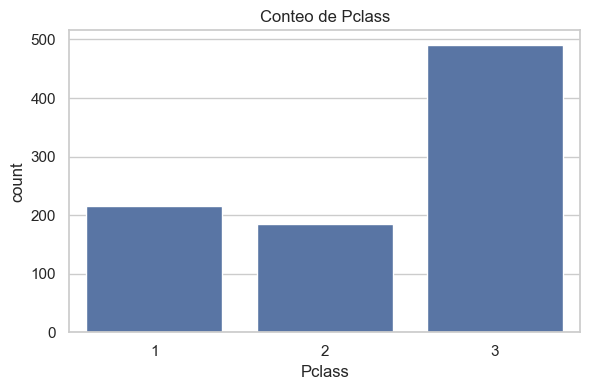

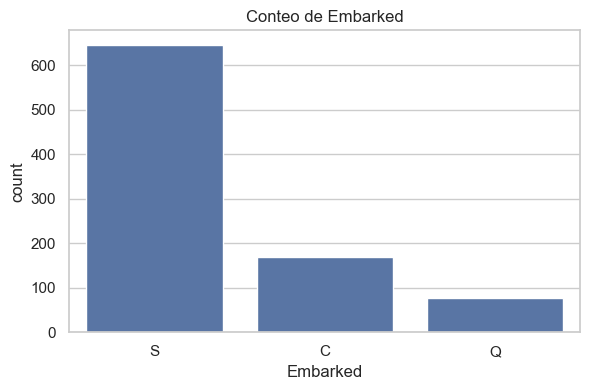

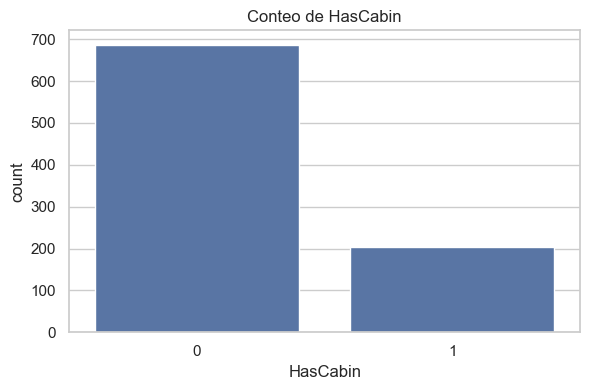

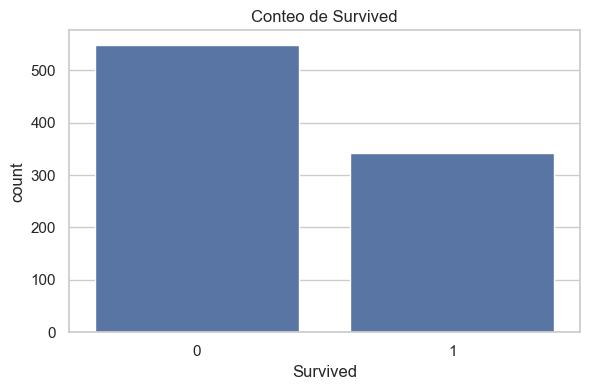

In [21]:
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'HasCabin', 'Survived']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Conteo de {col}')
    save_plot(f'count_{col}.png')
    plt.show()  
    plt.close()  

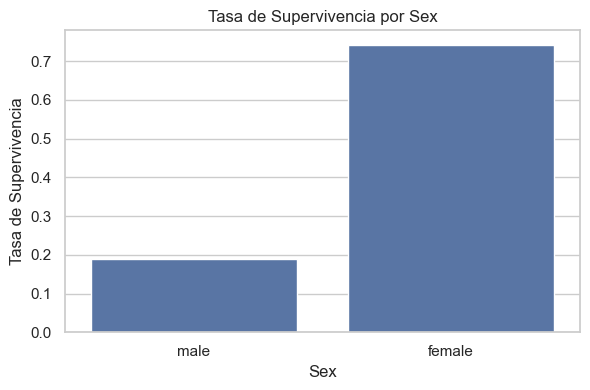

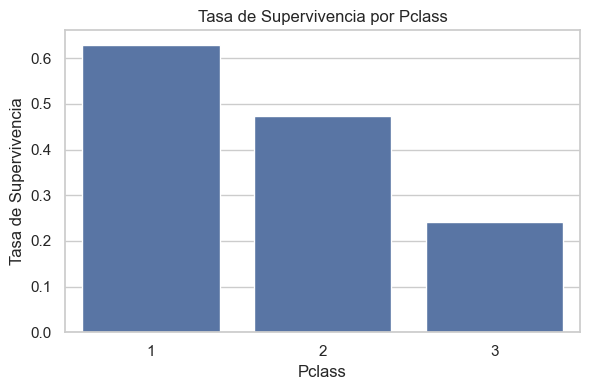

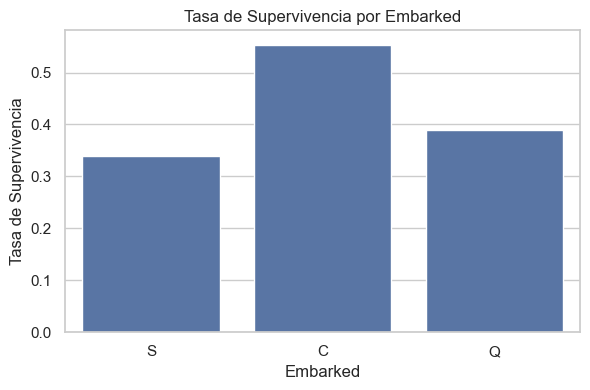

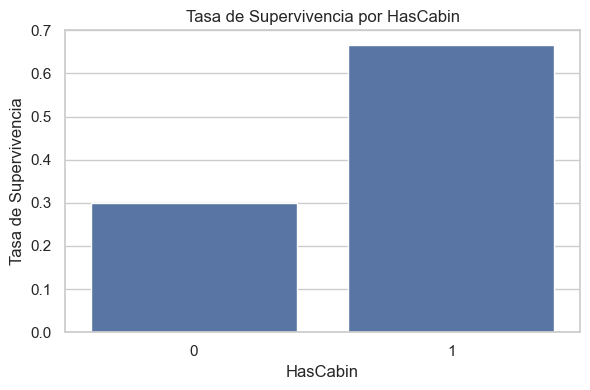

In [22]:
for col in ['Sex', 'Pclass', 'Embarked', 'HasCabin']:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df, x=col, y='Survived', errorbar=None)
    plt.title(f'Tasa de Supervivencia por {col}')
    plt.ylabel('Tasa de Supervivencia')
    save_plot(f'survival_by_{col}.png')
    plt.show()  
    plt.close()  

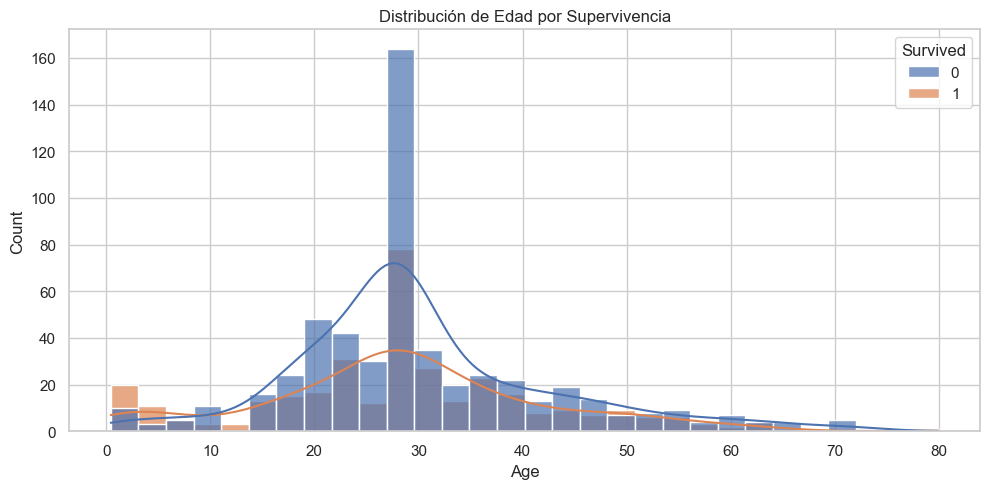

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, alpha=0.7)
plt.title('Distribución de Edad por Supervivencia')
save_plot('age_by_survival.png')
plt.show()  
plt.close()  

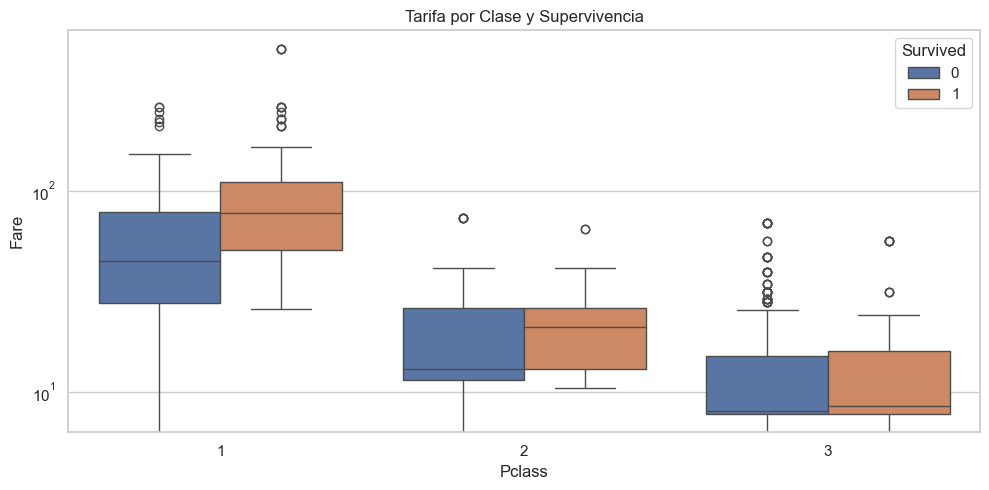

In [24]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.title('Tarifa por Clase y Supervivencia')
plt.yscale('log')  
save_plot('fare_by_pclass_survival.png')
plt.show()  
plt.close()  

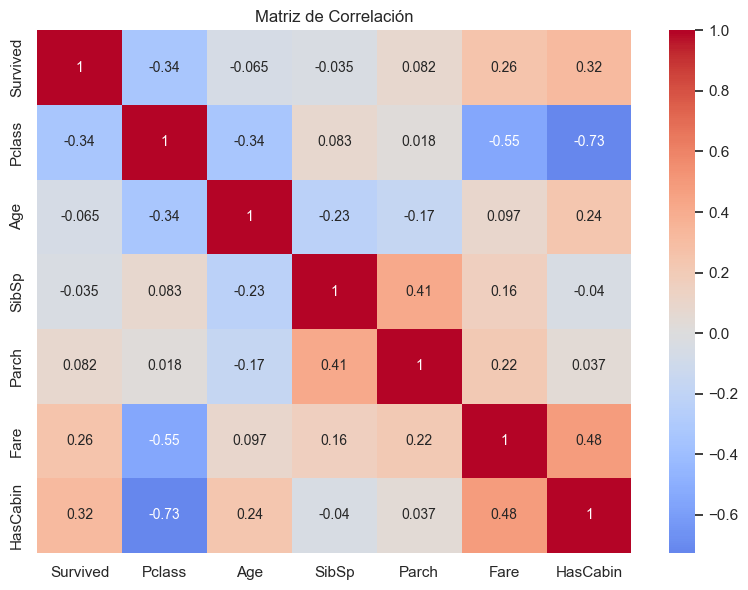

In [25]:
num_and_target = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin']]
plt.figure(figsize=(8, 6))
sns.heatmap(num_and_target.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
save_plot('correlation_matrix.png')
plt.show()  
plt.close()  

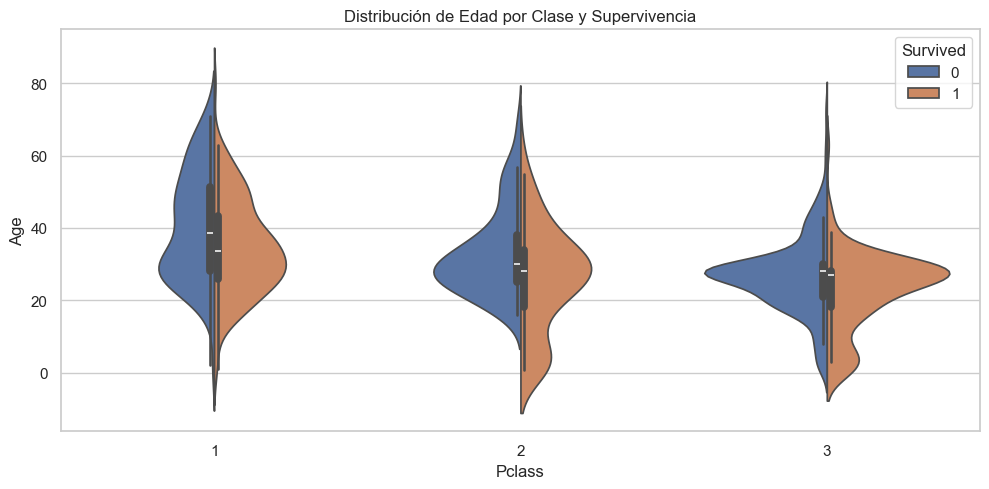

In [26]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Distribución de Edad por Clase y Supervivencia')
save_plot('violin_age_pclass_survival.png')
plt.show()  
plt.close()  


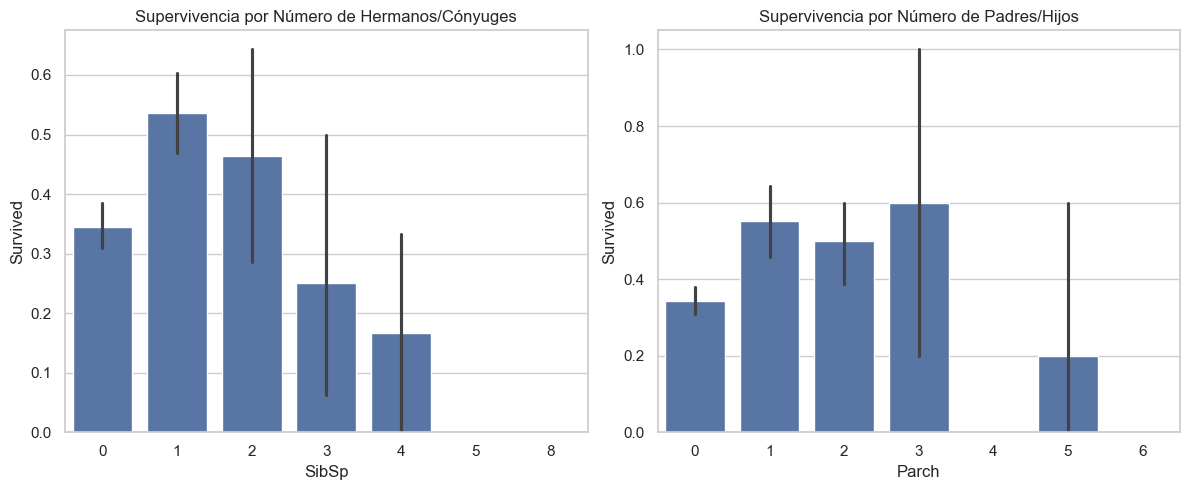

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=df, x='SibSp', y='Survived', ax=axes[0])
axes[0].set_title('Supervivencia por Número de Hermanos/Cónyuges')

sns.barplot(data=df, x='Parch', y='Survived', ax=axes[1])
axes[1].set_title('Supervivencia por Número de Padres/Hijos')

save_plot('family_survival.png')

plt.show()  
plt.close()  

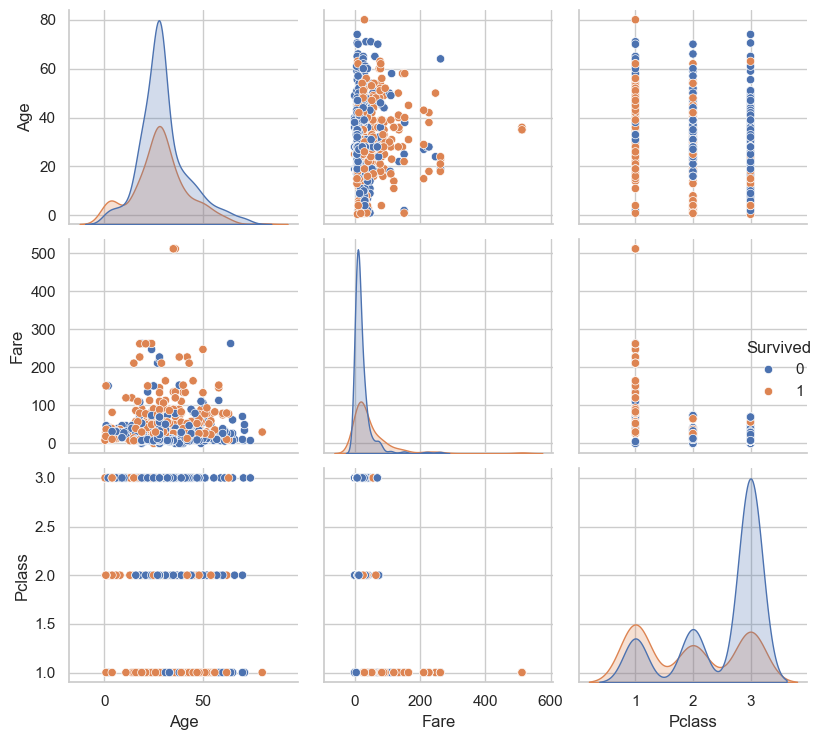

In [28]:
pair_cols = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(df[pair_cols], hue='Survived', diag_kind='kde')
save_plot('pairplot_key_vars.png')

plt.show()  
plt.close()  

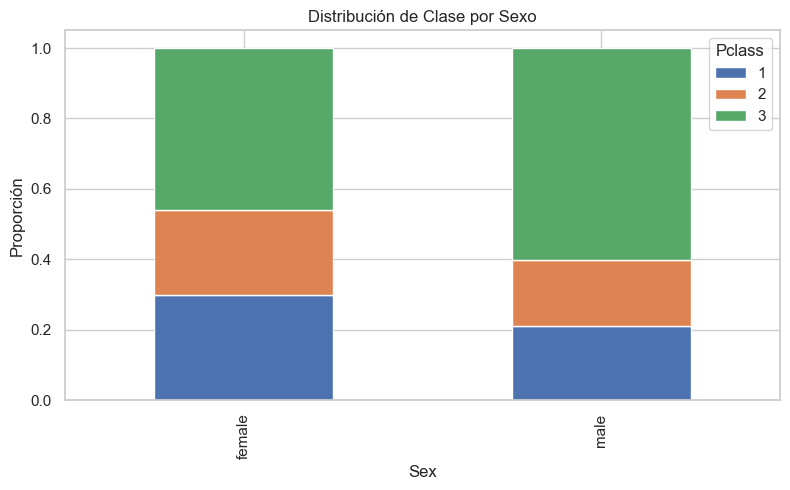

In [29]:
cross_tab = pd.crosstab(df['Sex'], df['Pclass'], normalize='index')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribución de Clase por Sexo')
plt.ylabel('Proporción')
save_plot('sex_pclass_stacked.png')

plt.show()  
plt.close()  